<h1><strong>A Match Made In Heaven</strong></h1>
<br>
<strong>Dennis Li, Eric Gao</strong>

<strong><h1>Introduction: </h1></strong> <br>
It may or may not be spring time, but love remains in the air. With the explosion of various different dating sites, online matchmaking has seemingly become the best way to meet new people and get dates. Face-to-face dating events have pretty much become a thing of the past. Nevertheless, speed dating is still a method for romantics to find their soul mate. "Love at first sight". "Star crossed lovers". There are quite a few idioms surrounding the mystery of attraction and love. And then there are always the statements about how personality is what truly makes someone beautiful. But what really makes someone attractive? What makes them attractive enough to take the time to try and get to know their personality.
<br>
By compiling and analyzing data on thousands of speed dates, we can get an idea of what exactly makes certain people seem more desirable than others. This tutorial will walk through different steps to generate analyses that try to find those traits.

<strong>Libraries</strong>
<br>
These will be the libraries that will be necessary for various different analyses.

In [2]:
# This will automatically install seaborn
!pip install --upgrade pip
!pip install seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression

    100% |████████████████████████████████| 1.3MB 319kB/s ta 0:00:01
  Found existing installation: pip 9.0.3
    Uninstalling pip-9.0.3:
      Successfully uninstalled pip-9.0.3


<strong>Getting the data</strong>
<br>
Use pandas to read the data from a csv file into a dataframe

In [3]:
dating_info = pd.read_csv('Speed Dating Data.csv', encoding = "ISO-8859-1")
dating_info.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


<strong>Tidying Data:</strong><br>
A quick glance at the original table reveals an incredible number of different columns, or attributes, that may or may not need to be considered. You will notice many of these attributes are missing data. In trying to find specific traits that make someone attractive or desirable at first glance, the data for some of the attributes would be much more useful than others. Using too many factors to determine attractiveness could make it hard to find a noticeable distinction between being attractive and not. Additionally, each entry in the original table may be missing various values, which pose challenges when attempting to perform analyses on the data. In order to ensure a smooth analysis process, we can take steps to transform, or "tidy", the initial data to something that is easier to work with. After tidying the data, you will see that attributes that were missing data have been removed, in order to ease the analysis process

In [4]:
# take a subset of the columns from the original table
data = dating_info[['iid', 'pid', 'match', 'race', 'race_o', 'age', 'gender', 'field_cd', 'career_c', 'attr3_1', 'attr_o']]

# dictionaries to define the codes used in the table
field_codes = {1: 'Law', 2: 'Math', 3: 'Social Science, Psychologist', 4: 'Medical Science', 5: 'Engineering',
               6: 'English/Creative Writing/Journalism', 7: 'History/Religion/Philosophy', 8: 'Business/Econ/Fiance', 
               9: 'Education, Academia', 10: 'Biological Sciences/Chemistry/Physics', 11: 'Social Work', 12:'Undergrad/Undecided',
               13: 'Political Science/International Affairs', 14: 'Film', 15: 'Fine Arts/Arts Administration',16: 'Languages',
               17: 'Architecture',18: 'Other'}
career_codes = {1:'Lawyer',2:'Academic/Research',3:'Psychologist',4:'Doctor/Medicine',5:'Engineer',6:'Entertainment',
               7:'Finance',8:'Real Estate',9:'International Affairs',10:'Undecided',
               11:'Social Work',12:'Speech Pathology',13:'Politics',14:'Athletics',15:'Other',16:'Journalism',
               17:'Architecture'}
race_codes = {1:'Black',2:'European',3:'Latino/Hispanic',4:'Asian',5:'Native American',6:'Other'}
gender_codes = {0:'female',1:'male'}

# Remove all entries that are missing any data
data = data[pd.notnull(data['race'])]
data = data[pd.notnull(data['age'])]
data = data[pd.notnull(data['field_cd'])]
data = data[pd.notnull(data['career_c'])]
data = data[pd.notnull(data['pid'])]
data = data[pd.notnull(data['race_o'])]
data = data[pd.notnull(data['attr3_1'])]
data = data[pd.notnull(data['attr_o'])]

# Convert all coded columns from floats to ints in order to use the dictionaries defined above
data = data.assign(pid=data['pid'].astype(int))
data = data.assign(race=data['race'].astype(int))
data = data.assign(race_o=data['race_o'].astype(int))
data = data.assign(age=data['age'].astype(int))
data = data.assign(field_cd=data['field_cd'].astype(int))
data = data.assign(career_c=data['career_c'].astype(int))
data = data.assign(attr3_1=data['attr3_1'].astype(int))
data = data.assign(attr_o=data['attr_o'].astype(int))

# Rename some columns
data = data.rename(index=str, columns={"attr3_1":"self_perc", "attr_o":"partner_perc"})

data.head()

,iid,pid,match,race,race_o,age,gender,field_cd,career_c,self_perc,partner_perc
30,4,11,0,2,2,23,0,1,1,7,6
31,4,12,0,2,2,23,0,1,1,7,6
32,4,13,0,2,4,23,0,1,1,7,10
33,4,14,1,2,2,23,0,1,1,7,7
34,4,15,0,2,3,23,0,1,1,7,8


<strong><h1>Exploratory Data Analysis</h1></strong>
<br>
Now that we have finished tidying our data, we can start performing some analyses.

We first make plots showing attractiveness based on some attributes according to the number of total matches based on that specific attribute. We first make a plot of attractiveness based on race.

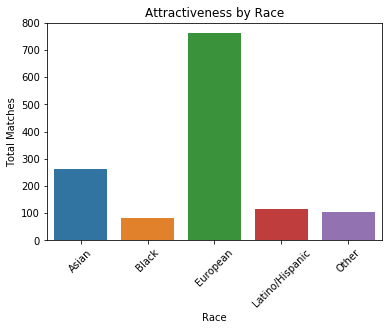

In [5]:
plot_index = 0
plt.figure(plot_index)
plot_index += 1

# Add the decoded race as a new column so when the corresponding bar plot is created, it is easier to read
races = []
races_o = []
for index, row in data.iterrows():
    race_code = row['race']
    race_o_code = row['race_o']
    race = race_codes[race_code]
    race_o = race_codes[race_o_code]
    races.append(race)
    races_o.append(race_o)
data = data.assign(race_desc=races)
data = data.assign(race_o_desc=races_o)

data_grouped = data.groupby('race_desc')
att_by_race = data_grouped['match'].sum().reset_index()
att_by_race.columns = ['Race', 'Total Matches']

# plot attractiveness by race
p = sns.barplot(data=att_by_race, x='Race', y='Total Matches')
plt.title("Attractiveness by Race")
for item in p.get_xticklabels():
    item.set_rotation(45)
plt.show()

Based on this plot, it seems Europeans are the most desirable by a fair margin, followed by Asians and then Latinos/Hispanics

Now let's see how age affects attractiveness

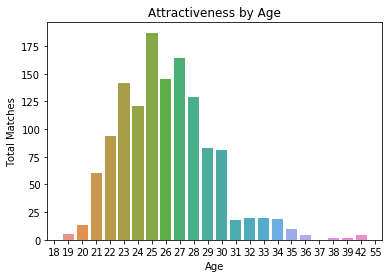

In [6]:
plt.figure(plot_index)
plot_index += 1

data_grouped = data.groupby('age')
att_by_race = data_grouped['match'].sum().reset_index()
att_by_race.columns = ['Age', 'Total Matches']

# plot attractiveness by age
p = sns.barplot(data=att_by_race, x='Age', y='Total Matches')
plt.title("Attractiveness by Age")
plt.show()

From this plot, it seems the most attractive people are those in their 20s

And then let's plot by occupation

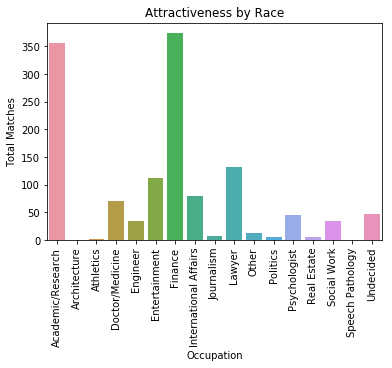

In [7]:
plt.figure(plot_index)
plot_index += 1

# Add the decoded career, or occupation, as a new column so when the corresponding bar plot is created, it is more understandable
occupations = []
for index, row in data.iterrows():
    occupation_code = row['career_c']
    occupation = career_codes[occupation_code]
    occupations.append(occupation)
data = data.assign(occupation=occupations)

data_grouped = data.groupby('occupation')
att_by_race = data_grouped['match'].sum().reset_index()
att_by_race.columns = ['Occupation', 'Total Matches']

# plot attractiveness by race
p = sns.barplot(data=att_by_race, x='Occupation', y='Total Matches')
plt.title("Attractiveness by Race")
for item in p.get_xticklabels():
    item.set_rotation(90)
plt.show()

It seems people in Finance and Academia/Research are the most attractive by quite a bit, followed by Lawyers and those in Entertainment

<strong><h1>Hypothesis Testing</h1></strong>

While the above exploratory analyses do give an idea of the general characteristics regarding desirability, they don't really provide an idea of what it takes to be, or what makes someone, attractive. We can take the next step and try to find the factor, or factors, that really make someone desirable. Based on the analyses from above, a good starting point would be to presume matches come as a result of exterior features, such as attractiveness. So let's see if this is the case.

We will first need a scale with which to measure the effectiveness of any given factor in finding a match. For this, we will use the percentage of first dates, or pairings, that resulted in a match. Any iid's that are missing will mean that person did not find a single match.

In [188]:
# Find how many total partners each person had and how many total matches they had as well
group_by_person = data.groupby('iid')
num_partners = group_by_person['pid'].count().reset_index()
num_partners.columns = ['iid','num_partners']
num_matches = group_by_person['match'].sum().reset_index()
num_matches.columns = ['iid', 'num_matches']

# Calculate the percentage of matches each person ended up getting
match_percentages = []
iids = []
for index, row in num_partners.iterrows():
    iid = row['iid']
    iids.append(iid)
    num_partner = row['num_partners']
    num_match_row = num_matches.loc[num_matches['iid']==iid]
    num_match = num_match_row['num_matches']
    match_percentages.append(float(num_match/num_partner))

# Create a dataframe to save the results
d = {'iid':iids,'match_percentage':match_percentages}
percentage_df = pd.DataFrame(data=d)
percentage_df.head()

,iid,match_percentage
0,4,0.2
1,5,0.2
2,6,0.2
3,7,0.2
4,8,0.8


In speed dating, two people are set up together by a third party for their "first dates" where they get their first impression of each other. I'm sure many of you have heard the saying "Beauty is in the eye of the beholder"; as such, first impressions could have a pretty big impact when it comes to finding a match. For that matter, the ability to make good first impressions can be considered a factor in attractiveness, so let's see how important first impressions, or perceived attractiveness, can be in finding a match.

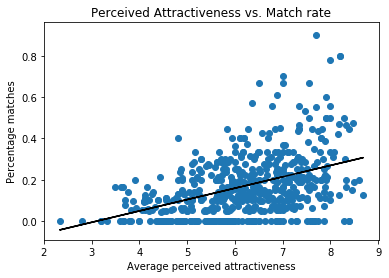

In [194]:
# Find the average of all columns for simplified access later on
avg_perc = group_by_person.mean().reset_index()

# Plot the match rates
plt.figure(plot_index)
plot_index += 1

x = avg_perc['partner_perc']
y = percentage_df['match_percentage']

plt.scatter(x,y)
b, m = polyfit(x, y, 1)
plt.plot(x, b + m * x, '-', color='black')
plt.xlabel('Average perceived attractiveness')
plt.ylabel('Percentage matches')
plt.title('Perceived Attractiveness vs. Match rate')
plt.show()

It seems like an increase in a person's average perceived attractiveness is associated with an increase in the person's chances of finding a match. This shouldn't come as too much of a surprise, but let's find the exact correlation to be sure.

In [195]:
# Combine the data from the two separate dataframes into one to make it easier to perform a linear regression
att_vs_matches_data = {'avg_att':x,'match_percentage':y}
att_vs_matches = pd.DataFrame(data=att_vs_matches_data)

# Calculate the correlation
model = ols(formula='match_percentage ~ avg_att', data=att_vs_matches).fit()
model.params

Intercept   -0.171038
avg_att      0.055047
dtype: float64

So it turns out that there is only a correlation of 0.05 between a person's average perceived attractiveness and the chances of them finding a match. This is really low ... so there is probably something else that determines if a person is desirable or not.

The plot showing the relation between attractiveness and matches seems to suggest a pretty linear relationship, and yet a calculation of that model reveals a very low correlation. Those two representations may make it hard to visualize or understand why those analyses seem to contradict each other and reveal a low correlation and weak relationship. Here is another way of thinking about the problem.

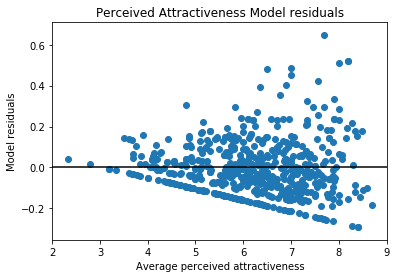

In [196]:
# Calculate the residuals of the model
model_residuals = []
predictions = model.predict()
for index, row in att_vs_matches.iterrows():
    match_percentage = row['match_percentage']
    model_residuals.append(match_percentage - predictions[index])
att_vs_matches['model_residuals'] = model_residuals

# Create a scatter plot of the residuals
plt.figure(plot_index)
plot_index += 1

x = att_vs_matches['avg_att']
y = att_vs_matches['model_residuals']

plt.scatter(x,y)
plt.axhline(0, color='black')
plt.xlabel('Average perceived attractiveness')
plt.ylabel('Model residuals')
plt.title('Perceived Attractiveness Model residuals')
plt.show()

This residual plot should reveal that the residuals of the predictions based on the model between attractiveness and match rates are spread out all over the place. Such a fact suggests that the given model is unable to accurately provide predictions for such a relationship.

Ok so it seems like how other people rate your attractiveness has close to no relationship in determining your chances of finding a match, what about the other way around? If a belief is that confident people are seen as more desirable, would being confident in your attractiveness make your chances of finding a match higher?

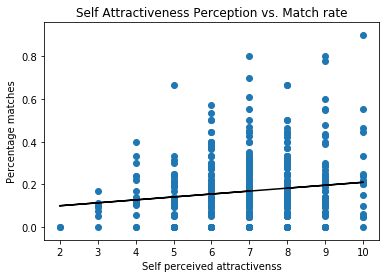

In [200]:
plt.figure(plot_index)
plot_index += 1

# Only consider the data regarding self perception
x = avg_perc['self_perc']
y = percentage_df['match_percentage']

plt.scatter(x,y)
plt.title("Self Attractiveness Perception vs. Match rate")
plt.xlabel("Self perceived attractivenss")
plt.ylabel("Percentage matches")
b, m = polyfit(x, y, 1)
plt.plot(x, b + m * x, '-', color='black')
plt.show()

Once again there seems to be some linear relationship between self perceived attractiveness and one's chances of finding a match, but again we will find the actual correlation to be sure.

In [201]:
# Combine the data from the two separate dataframes into one to make it easier to perform a linear regression
att_vs_matches_data = {'avg_att':x,'match_percentage':y}
att_vs_matches = pd.DataFrame(data=att_vs_matches_data)

# Calculate the correlation
model = ols(formula='match_percentage ~ avg_att', data=att_vs_matches).fit()
model.params

Intercept    0.071952
avg_att      0.013787
dtype: float64

And once again, the correlation seems to be extremely low. It seems that your attractiveness, regardless of whose perception it is based on, has pretty much no impact on finding a match.

So now that we know attraction is not the factor, or at least is not the only factor, when it comes to finding a match, this situation begs the questions: What do people look for then? As part of this event, participants were asked how much they valued certain characteristics; so let's see how they answered that question. The representation will assume males and females generally have different criteria and are thus displayed separately.

Let's first calculate the average importance people assigned to various attributes

In [202]:
# We are creating a new dataframe, so we will need to do a little tidying first
preferences = dating_info[['iid', 'gender','attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']]

# Remove any missing entries
preferences = preferences[pd.notnull(preferences['iid'])]
preferences = preferences[pd.notnull(preferences['attr1_1'])]
preferences = preferences[pd.notnull(preferences['sinc1_1'])]
preferences = preferences[pd.notnull(preferences['intel1_1'])]
preferences = preferences[pd.notnull(preferences['fun1_1'])]
preferences = preferences[pd.notnull(preferences['amb1_1'])]
preferences = preferences[pd.notnull(preferences['shar1_1'])]

# # Convert columns from floats to ints for easier analysis
# preferences = preferences.assign(attr1_1=preferences['attr1_1'].astype(int))
# preferences = preferences.assign(sinc1_1=preferences['sinc1_1'].astype(int))
# preferences = preferences.assign(intel1_1=preferences['intel1_1'].astype(int))
# preferences = preferences.assign(fun1_1=preferences['fun1_1'].astype(int))
# preferences = preferences.assign(amb1_1=preferences['amb1_1'].astype(int))
# preferences = preferences.assign(shar1_1=preferences['shar1_1'].astype(int))

# Rename columns for better readability
preferences = preferences.rename(index=str, columns={"attr1_1":"attractive", "sinc1_1":"sincere", "intel1_1":"intelligent",
                                                    "fun1_1":"fun", "amb1_1":"ambitious","shar1_1":"shared interests"})

# Remove duplicates
preferences = preferences.groupby('iid')
preferences = preferences.head(1)

# Calculate averages for each gender
preferences_grouped = preferences.groupby(['gender'])
avg_preferences = preferences_grouped.mean().reset_index()

# Drop the unneeded column
avg_preferences.drop(['iid'], axis=1, inplace=True)

# Decode genders for increased readability
genders = []
for index, row in avg_preferences.iterrows():
    gender_code = row['gender']
    gender = gender_codes[gender_code]
    genders.append(gender)

avg_preferences = avg_preferences.assign(gender=genders)

avg_preferences

,gender,attractive,sincere,intelligent,fun,ambitious,shared interests
0,female,17.938358,18.252910,20.937313,17.326343,12.828993,12.697836
1,male,27.008864,16.389707,19.419560,17.592051,8.823956,10.982271


And now let's graph it to get a better visual understanding of what the participants' preferences were.

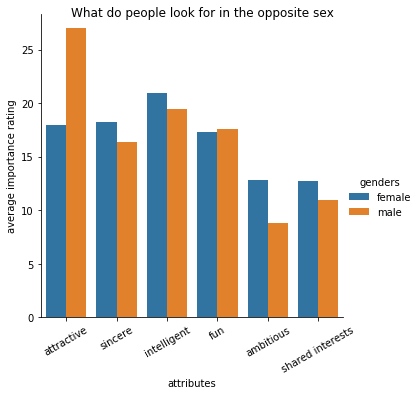

In [203]:
# Create a holder dataframe without the gender column as that is not one of the attributes that will be considered
temp = avg_preferences.drop(['gender'], axis=1)

# Transpose the data about attribute preferences in order to create a catplot of the data later on
columns = list(temp)
attributes = []
gender = []
values = []
for index, row in avg_preferences.iterrows():
    attributes = attributes + columns
    gender = gender + [row['gender']]*len(columns)
    values = values + list(temp.iloc[index])

# Create a dataframe based on the transposed data. Feel free to print the contents of this dataframe to see how the new dataframe
# organizes the original data
d = {'attributes':attributes,'genders':gender,'average importance rating':values}
df = pd.DataFrame(data=d)

# Create the double barplot, or catplot, of the preferences between the genders
plot = sns.catplot(x='attributes', y='average importance rating', hue='genders', data=df, kind='bar')
plot.fig.suptitle("What do people look for in the opposite sex")
plot.set_xticklabels(rotation=30)
plot

Ahh...There we go. So judging from this graph, it seems like people generally look for an individual with a variety of traits; men put a heavier emphasis on attractiveness whereas women prefer their partners to have more of a balance among the various attributes.

Well now that we know people generally look for other characteristics in addition to just basic attractiveness, let's make sure that the characteristics of the partners people end up matching with are in line with their initial preferences. If this is the case, then we would have a basis with which to predict a person's chances of finding a match.

In order to perform this evaluation, we will need some new information.

In [61]:
# We will be using a new subset of data, so we must tidy the data again
statedPref_vs_actualRating = dating_info[['match','pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha',
                                          'attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o']]
# Remove any missing data
statedPref_vs_actualRating = statedPref_vs_actualRating[pd.notnull(statedPref_vs_actualRating['pf_o_att'])]
statedPref_vs_actualRating = statedPref_vs_actualRating[pd.notnull(statedPref_vs_actualRating['pf_o_sin'])]
statedPref_vs_actualRating = statedPref_vs_actualRating[pd.notnull(statedPref_vs_actualRating['pf_o_int'])]
statedPref_vs_actualRating = statedPref_vs_actualRating[pd.notnull(statedPref_vs_actualRating['pf_o_fun'])]
statedPref_vs_actualRating = statedPref_vs_actualRating[pd.notnull(statedPref_vs_actualRating['pf_o_amb'])]
statedPref_vs_actualRating = statedPref_vs_actualRating[pd.notnull(statedPref_vs_actualRating['pf_o_sha'])]
statedPref_vs_actualRating = statedPref_vs_actualRating[pd.notnull(statedPref_vs_actualRating['attr_o'])]
statedPref_vs_actualRating = statedPref_vs_actualRating[pd.notnull(statedPref_vs_actualRating['sinc_o'])]
statedPref_vs_actualRating = statedPref_vs_actualRating[pd.notnull(statedPref_vs_actualRating['intel_o'])]
statedPref_vs_actualRating = statedPref_vs_actualRating[pd.notnull(statedPref_vs_actualRating['fun_o'])]
statedPref_vs_actualRating = statedPref_vs_actualRating[pd.notnull(statedPref_vs_actualRating['amb_o'])]
statedPref_vs_actualRating = statedPref_vs_actualRating[pd.notnull(statedPref_vs_actualRating['shar_o'])]

statedPref_vs_actualRating.head()

,match,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
0,0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0
1,0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0
2,1,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0
3,1,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0
4,1,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0


If upon examining the table entries it feels like the numbers in the first half of the columns seem consistently larger than those in the second set of columns, that is because they were based on different scales. In order to account for the difference in scoring scales, we must standardized the data.

In [209]:
# We will only need to consider the matches
statedPref_vs_actualRating = statedPref_vs_actualRating[statedPref_vs_actualRating['match']==1]

# Calculate the means and standard deviations of the initial preferences
pf_att_mean = statedPref_vs_actualRating['pf_o_att'].mean()
pf_att_std = statedPref_vs_actualRating['pf_o_att'].std()
pf_sin_mean = statedPref_vs_actualRating['pf_o_sin'].mean()
pf_sin_std = statedPref_vs_actualRating['pf_o_sin'].std()
pf_int_mean = statedPref_vs_actualRating['pf_o_int'].mean()
pf_int_std = statedPref_vs_actualRating['pf_o_int'].std()
pf_fun_mean = statedPref_vs_actualRating['pf_o_fun'].mean()
pf_fun_std = statedPref_vs_actualRating['pf_o_fun'].std()
pf_amb_mean = statedPref_vs_actualRating['pf_o_amb'].mean()
pf_amb_std = statedPref_vs_actualRating['pf_o_amb'].std()
pf_sha_mean = statedPref_vs_actualRating['pf_o_sha'].mean()
pf_sha_std = statedPref_vs_actualRating['pf_o_sha'].std()

# Calculate the means and standard deviations of the actual ratings people gave to their partners that they matched with
attr_mean = statedPref_vs_actualRating['attr_o'].mean()
attr_std = statedPref_vs_actualRating['attr_o'].std()
sinc_mean = statedPref_vs_actualRating['sinc_o'].mean()
sinc_std = statedPref_vs_actualRating['sinc_o'].std()
intel_mean = statedPref_vs_actualRating['intel_o'].mean()
intel_std = statedPref_vs_actualRating['intel_o'].std()
fun_mean = statedPref_vs_actualRating['fun_o'].mean()
fun_std = statedPref_vs_actualRating['fun_o'].std()
amb_mean = statedPref_vs_actualRating['amb_o'].mean()
amb_std = statedPref_vs_actualRating['amb_o'].std()
shar_mean = statedPref_vs_actualRating['shar_o'].mean()
shar_std = statedPref_vs_actualRating['shar_o'].std()

attPref_stand = []
sinPref_stand = []
intPref_stand = []
funPref_stand = []
ambPref_stand = []
shaPref_stand = []
attr_stand = []
sinc_stand = []
intel_stand = []
fun_stand = []
amb_stand = []
shar_stand = []

# Standardize the values in each entry by subtracting the entry by the mean of that column and then dividing by the standard
# deviation
for index, row in statedPref_vs_actualRating.drop(['match'],axis=1).iterrows():
    attPref_stand.append(abs((row['pf_o_att']-pf_att_mean)/pf_att_std))
    sinPref_stand.append(abs((row['pf_o_sin']-pf_sin_mean)/pf_sin_std))
    intPref_stand.append(abs((row['pf_o_int']-pf_int_mean)/pf_int_std))
    funPref_stand.append(abs((row['pf_o_fun']-pf_fun_mean)/pf_fun_std))
    ambPref_stand.append(abs((row['pf_o_amb']-pf_amb_mean)/pf_amb_std))
    shaPref_stand.append(abs((row['pf_o_sha']-pf_sha_mean)/pf_sha_std))
    attr_stand.append(abs((row['attr_o']-attr_mean)/attr_std))
    sinc_stand.append(abs((row['sinc_o']-sinc_mean)/sinc_std))
    intel_stand.append(abs((row['intel_o']-intel_mean)/intel_std))
    fun_stand.append(abs((row['fun_o']-fun_mean)/fun_std))
    amb_stand.append(abs((row['amb_o']-amb_mean)/amb_std))
    shar_stand.append(abs((row['shar_o']-shar_mean)/shar_std))

d = {'pf_att':attPref_stand,'pf_sin':sinPref_stand,'pf_int':intPref_stand,'pf_fun':funPref_stand,'pf_amb':ambPref_stand,
    'pf_sha':shaPref_stand,'attr_o':attr_stand,'sinc_o':sinc_stand,'intel_o':intel_stand,'fun_o':fun_stand,'amb_o':amb_stand,
    'shar_o':shar_stand}
standardized_pref_vs_actual = pd.DataFrame(data=d)
standardized_pref_vs_actual.head()

,pf_att,pf_sin,pf_int,pf_fun,pf_amb,pf_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
0,0.274890,0.175935,0.232634,0.000415,0.515563,0.133359,1.692939,1.511017,1.637322,1.600196,1.684163,1.761321
1,0.537096,1.711526,0.875972,3.412385,0.959175,0.965465,0.199542,0.134223,0.838384,0.270409,1.052767,0.682086
2,0.537096,0.985579,0.071799,1.241434,0.139876,1.389157,0.431285,0.554174,0.838384,1.059379,1.052767,0.142468
3,2.013432,2.437472,0.732373,1.241434,1.778474,0.604283,0.199542,0.554174,0.039445,0.270409,0.421371,1.221704
4,0.537096,1.711526,0.875972,3.412385,0.959175,0.965465,1.062112,0.822620,0.838384,0.935302,1.052767,1.221704


With the data standardized, we can now look for any correlation between a person's initial preferences and whether their match choices reflected those preferences. We will first start with attractiveness.

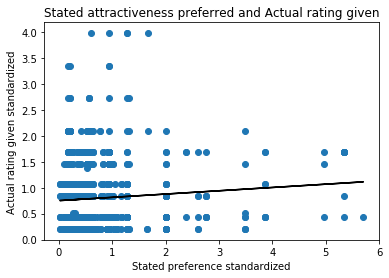

In [215]:
stated_preferences = standardized_pref_vs_actual[['pf_att','pf_sin','pf_int','pf_fun','pf_amb','pf_sha']]
ratings_given = standardized_pref_vs_actual[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o']]

plt.figure(plot_index)
plot_index += 1

# Scatter plot of preferred attractiveness vs actual rating given for their attractiveness
x = stated_preferences['pf_att']
y = ratings_given['attr_o']
plt.scatter(x,y)
plt.title("Stated attractiveness preferred and Actual rating given")
plt.xlabel("Stated preference standardized")
plt.ylabel("Actual rating given standardized")
b, m = polyfit(x, y, 1)
plt.plot(x, b + m * x, '-', color='black')
plt.show()

Hmm...glancing at this graph, it appears that regardless of a person's stated preference in attractiveness, they all seem to end up matching with people of the same attractiveness.

Let's calculate the correlation just to make sure.

In [216]:
# Store variables in dataframe for correlation calculation
pref_vs_actual_data = {'prefs':x,'rating':y}
pref_vs_actual = pd.DataFrame(data=pref_vs_actual_data)

# Calculate the correlation
model = ols(formula='rating ~ prefs', data=pref_vs_actual).fit()
model.params

Intercept    0.750473
prefs        0.063462
dtype: float64

So it seems people don't really match with people who meet their stated attractiveness preference.

At this point, it seems that attractiveness may not be much of a factor in determining match success. Let's consider the other characteristics that the participants were asked then, starting with their preferred sincerity in their match.

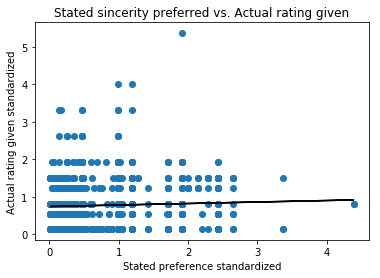

In [217]:
plt.figure(plot_index)
plot_index += 1

x = stated_preferences['pf_sin']
y = ratings_given['sinc_o']
plt.scatter(x,y)
plt.title("Stated sincerity preferred vs. Actual rating given")
plt.xlabel("Stated preference standardized")
plt.ylabel("Actual rating given standardized")
b, m = polyfit(x, y, 1)
plt.plot(x, b + m * x, '-', color='black')
plt.show()

This plot already makes it seem like stated sincerity preferrence does not have any influence in finding a match. But once again, we will calculate the actual correlation.

In [218]:
pref_vs_actual_data = {'prefs':x,'rating':y}
pref_vs_actual = pd.DataFrame(data=pref_vs_actual_data)

# Calculate the correlation
model = ols(formula='rating ~ prefs', data=pref_vs_actual).fit()
model.params

Intercept    0.743985
prefs        0.039928
dtype: float64

Almost no correlation.

Next let's look at intelligence.

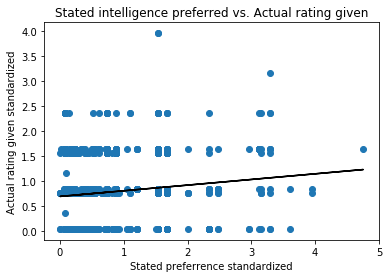

In [224]:
plt.figure(plot_index)
plot_index += 1

x = stated_preferences['pf_int']
y = ratings_given['intel_o']
plt.scatter(x,y)
plt.title("Stated intelligence preferred vs. Actual rating given")
plt.xlabel("Stated preferrence standardized")
plt.ylabel("Actual rating given standardized")
b, m = polyfit(x, y, 1)
plt.plot(x, b + m * x, '-', color='black')
plt.show()

Ok. So it seems that stated preferrence in intelligence does somewhat line up with the intelligence of the people they end up matching with.

In [220]:
pref_vs_actual_data = {'prefs':x,'rating':y}
pref_vs_actual = pd.DataFrame(data=pref_vs_actual_data)

# Calculate the correlation
model = ols(formula='rating ~ prefs', data=pref_vs_actual).fit()
model.params

Intercept    0.693825
prefs        0.112775
dtype: float64

So the correlation between stated preference and actual is slightly higher for intelligence than it was for attractiveness and sincerity, but the correlation is still very low. At this point, intelligence can probably only be considered a factor of very little importance in finding a match.

Let's now look at the correlation for how fun a person is. Do note that while the previous characteristics definitely had a fair amount of bias in their ratings, there was at least a relative amount of objectivity in the definition of the characteristic, as there are some aspects of them that are generally agreed upon universally. For this characteristic, however, everyone's definition could be considerably different, so any correlation found would be subject to different people's perspectives.

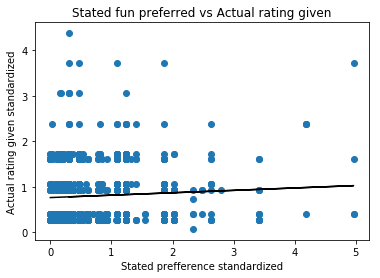

In [227]:
plt.figure(plot_index)
plot_index += 1

x = stated_preferences['pf_fun']
y = ratings_given['fun_o']
plt.scatter(x,y)
plt.title("Stated fun preferred vs Actual rating given")
plt.xlabel("Stated prefference standardized")
plt.ylabel("Actual rating given standardized")
b, m = polyfit(x, y, 1)
plt.plot(x, b + m * x, '-', color='black')
plt.show()

This relationship seems similar to that of attractiveness so let's verify.

In [228]:
pref_vs_actual_data = {'prefs':x,'rating':y}
pref_vs_actual = pd.DataFrame(data=pref_vs_actual_data)

# Calculate the correlation
model = ols(formula='rating ~ prefs', data=pref_vs_actual).fit()
model.params

Intercept    0.760062
prefs        0.052782
dtype: float64

And indeed, the correlation between the stated preferrence and actual rating of fun is very close to that of attractiveness, meaning again people did not really match with their initial preferrence for fun.

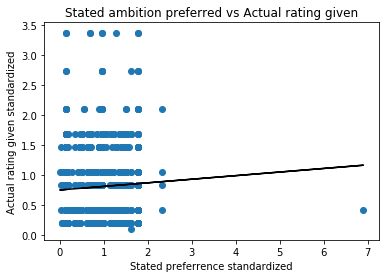

Intercept    0.756003
prefs        0.059711
dtype: float64

In [229]:
plt.figure(plot_index)
plot_index += 1

x = stated_preferences['pf_amb']
y = ratings_given['amb_o']
plt.scatter(x,y)
plt.title("Stated ambition preferred vs Actual rating given")
plt.xlabel("Stated preferrence standardized")
plt.ylabel("Actual rating given standardized")
b, m = polyfit(x, y, 1)
plt.plot(x, b + m * x, '-', color='black')
plt.show()

pref_vs_actual_data = {'prefs':x,'rating':y}
pref_vs_actual = pd.DataFrame(data=pref_vs_actual_data)

# Calculate the correlation
model = ols(formula='rating ~ prefs', data=pref_vs_actual).fit()
model.params

The correlation between stated ambition preferrence and matches is almost identical to that of fun, so we would come to the same conclusion about this characteristic as we did for fun.

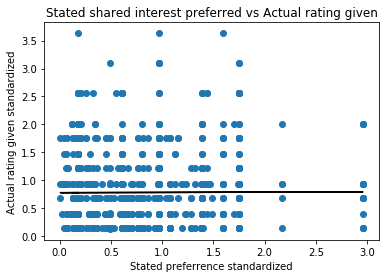

Intercept    0.779169
prefs        0.004789
dtype: float64

In [230]:
plt.figure(plot_index)
plot_index += 1

x = stated_preferences['pf_sha']
y = ratings_given['shar_o']
plt.scatter(x,y)
plt.title("Stated shared interest preferred vs Actual rating given")
plt.xlabel("Stated preferrence standardized")
plt.ylabel("Actual rating given standardized")
b, m = polyfit(x, y, 1)
plt.plot(x, b + m * x, '-', color='black')
plt.show()

pref_vs_actual_data = {'prefs':x,'rating':y}
pref_vs_actual = pd.DataFrame(data=pref_vs_actual_data)

# Calculate the correlation
model = ols(formula='rating ~ prefs', data=pref_vs_actual).fit()
model.params

Well it seems like people completely didn't care whether their matches had the same shared interests.

Since people don't hold too much importance in their matches having the same rating for any characteristic as their stated preferrences, maybe they consider the set of attributes as one single entity, and look for people that fit their preferrences as a whole. We will represent the combination of all the attributes as an average of the ratings of all attributes.

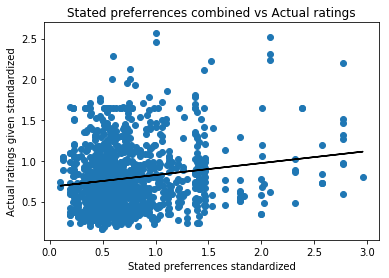

In [231]:
# Calculate the averages across each row
preference_avgs = stated_preferences.mean(axis=1)
ratings_avgs = ratings_given.mean(axis=1)

plt.figure(plot_index)
plot_index += 1

x = preference_avgs
y = ratings_avgs

plt.scatter(x,y)
plt.title("Stated preferrences combined vs Actual ratings")
plt.xlabel("Stated preferrences standardized")
plt.ylabel("Actual ratings given standardized")
b, m = polyfit(x, y, 1)
plt.plot(x, b + m * x, '-', color='black')
plt.show()

In [90]:
# Combine the data from the two separate dataframes into one to make it easier to perform a linear regression
pref_vs_actual_avg_data = {'avg_prefs':x,'avg_rating':y}
pref_vs_actual = pd.DataFrame(data=pref_vs_actual_avg_data)

# Calculate the correlation
model = ols(formula='avg_rating ~ avg_prefs', data=pref_vs_actual).fit()
model.params

Intercept    0.679237
avg_prefs    0.146477
dtype: float64

While this does reveal that people did consider their matches as a combination of all their different characteristics, the importance they placed on their partners meeting up to their preferences was still very low. Not to say people didn't care at all, but as a whole, it isn't something that would be able to predict the chance of a match.

<strong><h1>Conclusion</h1></strong>

There does not seem to be any distinct or obvious way to determine whether people will match based on any measureable or calculated statistics. While there are some trends that can be observed in terms of matching patterns, none of those factors, nor any apparent combination of those factors, are enough to provide a means to develop a sophisticated enough model that can predict possible matches.
<br><br>
Now, while this analysis was not able to find any model or methodology that can accurately predict someone's chances of finding a match, there are some conclusions that can be drawn from the lack of such a model. First and foremost, the results of this tutorial should serve as an incentivizer for people who are looking for a special someone to go out and just meet lots of people. Regardless of how you perceive yourself or how others actually perceive you, none of that really determines your true desirability. What's more, even if someone your interested in seems to be looking for specific traits that you don't think you have or has expectations you don't think you can meet, more likely than not, it could be quite the opposite: they will find themselves attracted to someone that has little connection to their "preferrences" or "requirements".
<br><br>
If your really interested in using Speed Dating as a means to find your match, be aware that this tutorial is not suggesting you will have the best odds of by being overly ambitious with your descriptions or your behavior, but that disregarding the superficial aspects of attractiveness that may limit you from being yourself would probably be your best bet at finding success at one of these events. One disclaimer, however, is that this data was collected from those who went to Columbia at the time, so generalizing the results of this tutorial to every situation may not always be the best idea. Simply, use the results of this tutorial as another tool to help you on your search for that special someone.